# Biodiversity in National Parks

This project comes from the [Codecademy](https://www.codecademy.com/learn) Data Science Career Path.

Through this project, I will analyze the species info dataset in conjunction with the observational data.

In [2]:
import pandas as pd
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")
species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


In [3]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


To start the analysis, I will look at the distributions of conservation status and category in the `species` dataset.

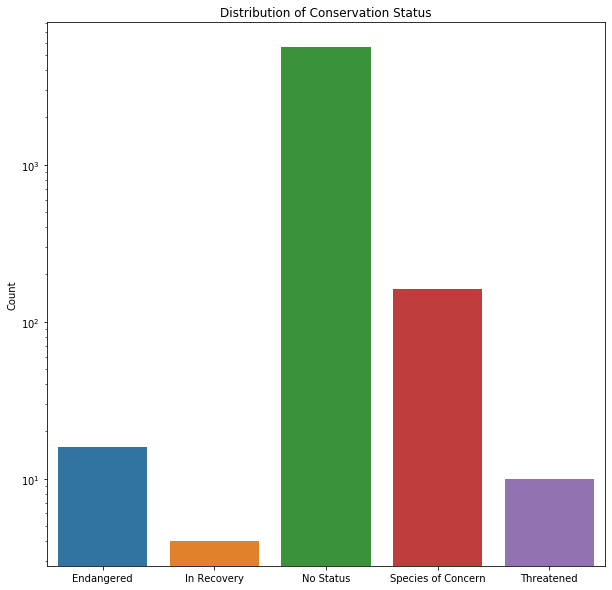

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
species = species.fillna("No Status")
con_status_count = species[["scientific_name", "conservation_status"]].groupby("conservation_status").count().rename(columns={"scientific_name":"Count"})
con_status_count.reset_index(inplace=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(data=con_status_count, x="conservation_status", y="Count")
ax.set(yscale="log", title="Distribution of Conservation Status", xlabel="")
plt.show()


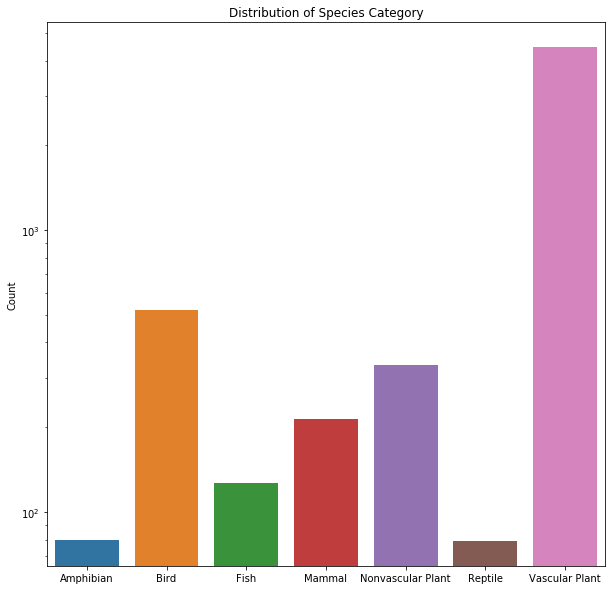

In [50]:
con_status_count = species[["scientific_name", "category"]].groupby("category").count().rename(columns={"scientific_name":"Count"})
con_status_count.reset_index(inplace=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(data=con_status_count, x="category", y="Count")
ax.set(yscale="log", title="Distribution of Species Category", xlabel="")
plt.show()

So the vast majority of the dataset (note the log-scale on the y-axis) are species with no conservation status. Additionally, vacular plants make up the majority of the species categories.

Let's see this broken down a bit further to see how conservation status is distributed across each categoery.

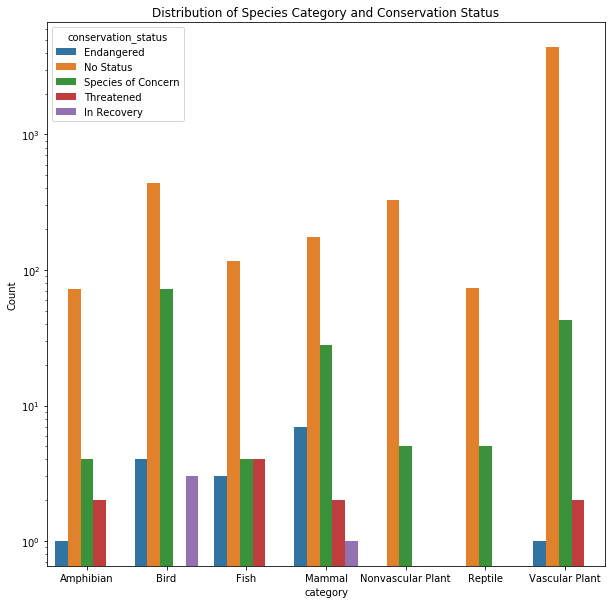

In [53]:
con_status_count = species[["category","scientific_name", "conservation_status"]].groupby(["category", "conservation_status"]).count().rename(columns={"scientific_name":"Count"})
con_status_count.reset_index(inplace=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(data=con_status_count, x="category", y="Count", hue="conservation_status")
ax.set(yscale="log", title="Distribution of Species Category and Conservation Status",)
plt.show()



In [241]:
obs = observations[["scientific_name", "park_name"]].groupby("park_name").count().rename(columns={"scientific_name":"Count"})
obs.reset_index(inplace=True)
obs


,park_name,Count
0,Bryce National Park,5824
1,Great Smoky Mountains National Park,5824
2,Yellowstone National Park,5824
3,Yosemite National Park,5824


So each park has the same number of observations. But upon close inspection, while most species have one record per park, some species have two or three with different observation values for each. While these could all be incorrectly imported data, or data collected on differnt dates, I will make the assumption that these observations were all intended to be added together.

In [242]:
obs = observations.groupby(["scientific_name", "park_name"]).sum()
obs.reset_index(inplace=True)
obs

,scientific_name,park_name,observations
0,Abies bifolia,Bryce National Park,109
1,Abies bifolia,Great Smoky Mountains National Park,72
2,Abies bifolia,Yellowstone National Park,215
3,Abies bifolia,Yosemite National Park,136
4,Abies concolor,Bryce National Park,83
...,...,...,...
22159,Zygodon viridissimus,Yosemite National Park,159
22160,Zygodon viridissimus var. rupestris,Bryce National Park,102
22161,Zygodon viridissimus var. rupestris,Great Smoky Mountains National Park,102
22162,Zygodon viridissimus var. rupestris,Yellowstone National Park,237


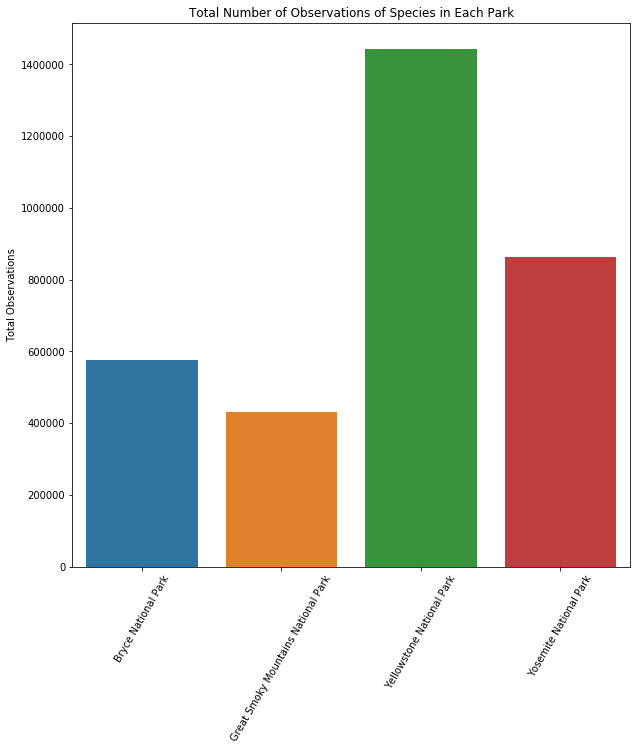

In [243]:
total_obs = obs.groupby("park_name").sum().rename(columns={"observations":"Total Observations"})
total_obs.reset_index(inplace=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(data=total_obs, x="park_name", y="Total Observations")
ax.set(title="Total Number of Observations of Species in Each Park", xlabel='')
plt.xticks(rotation=60)
plt.show()

This chart would seem to imply that **Yellowstone National Park** has the greatest total number of organisms as compared to the other three parks. 

Since each dataset contains a column titled `scientific_name`, we can now join the two datasets on that column to further explore how many endangered or threatened species each park contains.

In [253]:
obs_extended = obs.set_index('scientific_name').join(species.set_index('scientific_name'))


In [250]:
needs_help = obs_extended[obs_extended["conservation_status"].isin(["Endangered", "Threatened"])]
needs_help = needs_help[['observations', 'conservation_status', 'park_name']].groupby(['park_name', 'conservation_status']).sum().rename(columns={"observations":"Count"})

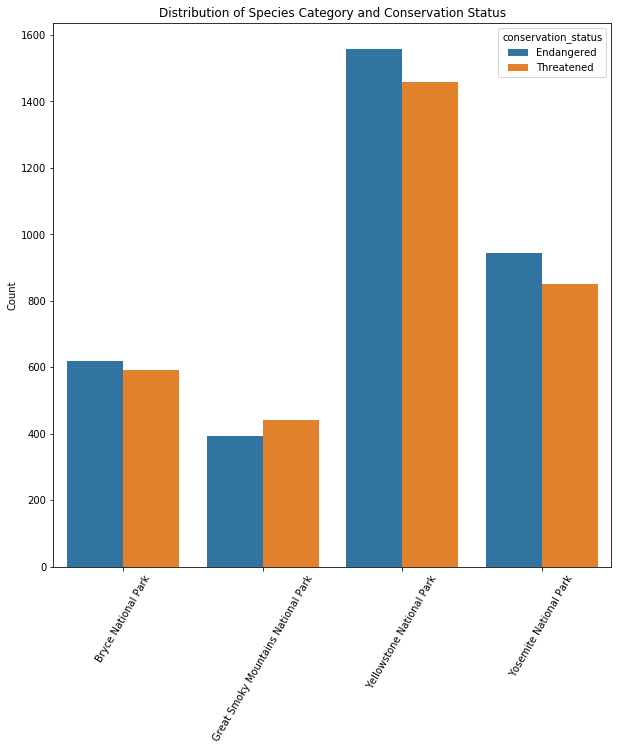

In [251]:
needs_help.reset_index(inplace=True)
plt.figure(figsize=(10,10))
ax = sns.barplot(data=needs_help, x="park_name", y="Count", hue="conservation_status")
ax.set(title="Distribution of Species Category and Conservation Status", xlabel="")
plt.xticks(rotation=60)
plt.show()

Finally, we can see how the observational numbers vary across the various categories. We will combine the observations of each species across all parks.

In [254]:
species_obs = obs_extended.groupby(['scientific_name', 'category']).sum()
species_obs.reset_index(inplace=True)
species_obs

,scientific_name,category,observations
0,Abies bifolia,Vascular Plant,532
1,Abies concolor,Vascular Plant,630
2,Abies fraseri,Vascular Plant,518
3,Abietinella abietina,Nonvascular Plant,592
4,Abronia ammophila,Vascular Plant,523
...,...,...,...
5536,Zonotrichia leucophrys gambelii,Bird,560
5537,Zonotrichia leucophrys oriantha,Bird,558
5538,Zonotrichia querula,Bird,616
5539,Zygodon viridissimus,Nonvascular Plant,600


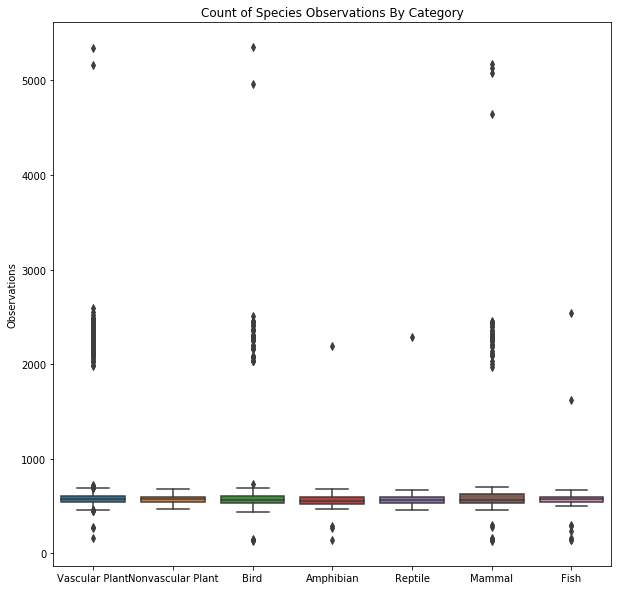

In [255]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="category", y="observations", data=species_obs)
ax.set(title="Count of Species Observations By Category", xlabel="", ylabel="Observations")
plt.show()

Most species were observed between 500 and 800 times. **Vascular Plants**, **Birds**, and **Mamals** all have a fair number of outliers greater than 2000, while **Amphibians**, **Reptiles**, and **Fish** do not have many outliers with high observational counts. This could be due to the fact that none of these four parks are in areas greatly hospitible to these species.